In [14]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move
from pocket_cube.constants import MOVES, CORNERS, COLORS, LETTERS

%matplotlib notebook
%matplotlib inline

# Creating a scrambled cube 

In [2]:
cube = Cube("F' R U R U F' U'")

## 2D Cube visualization 

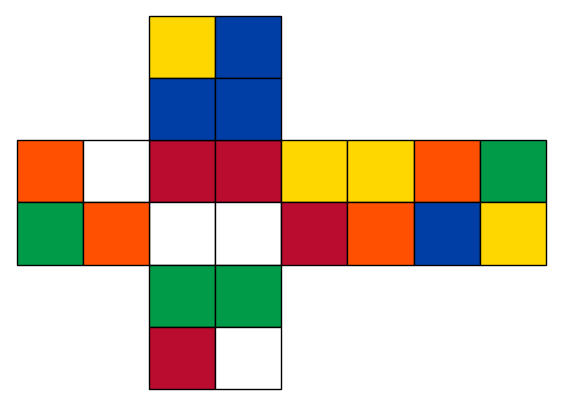

In [3]:
cube.render()

## Text representation 

In [4]:
cube.render_text()

  YB
  BB
OWRRYYOG
GOWWROBY
  GG
  RW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

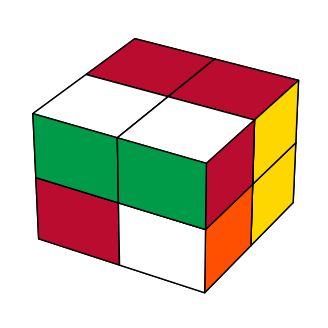

In [5]:
cube.render3D()

# Creating an unscrambled cube 

In [6]:
cube = Cube(scrambled=False)

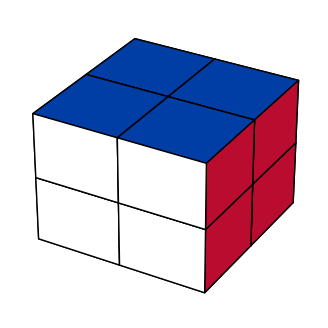

In [7]:
cube.render3D()

## Applying moves on the cube 

In [8]:
cube = cube.move(Move.R)
cube = cube.move(Move.F)

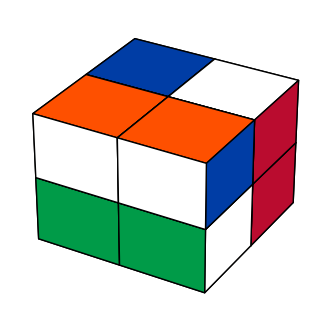

In [9]:
cube.render3D()

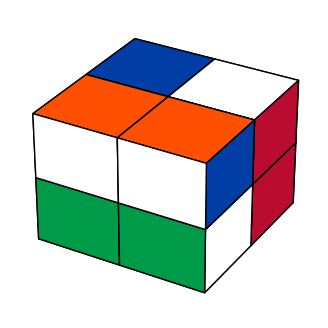

In [10]:
cube.render3D_moves(cube.state, [Move.Fp, Move.Rp])

## Constants

In [18]:
FACE_SIZE = 4
FACES = 6
FINAL_CUBE = Cube(scrambled=False)
FINAL_HASH = FINAL_CUBE.hash()
ALL_MOVES = [Move.R,Move.F, Move.U,Move.Rp,Move.Fp,Move.Up]

map_cube_full = [
    [20, -1, -1, 15, 2, -1], 
    [21, 6, -1, -1, 3, -1], 
    [22, -1, -1, 14, -1, 11], 
    [23, 7, -1, -1, -1, 10], 
    [-1, -1, 18, 13, 0, -1], 
    [-1, 4, 19, -1, 1, -1], 
    [-1, -1, 16, 12, -1, 9],
    [-1, 5, 17, -1, -1, 8]
]

map_cube = [
    (20, 15, 2), 
    (21, 6, 3), 
    (22, 14, 11), 
    (23, 7, 10), 
    (18, 13, 0), 
    (4, 19, 1), 
    (16, 12, 9), 
    (5, 17, 8)
]

map_to_coords = {
    0 : (0, 0, 0),
    1 : (1, 0, 0),
    2 : (0, 0, 1),
    3 : (1, 0, 1),
    4 : (0, 1, 0),
    5 : (1, 1, 0),
    6 : (0, 1, 1),
    7 : (1, 1, 1)
}

dist_map = {
    0 : [0, 1, 1, 2, 1, 2, 2, 3],
    1 : [1, 0, 2, 1, 2, 1, 3, 2],
    2 : [1, 2, 0, 1, 2, 3, 1, 2],
    3 : [2, 1, 1, 0, 3, 2, 2, 1],
    4 : [1, 2, 2, 3, 0, 1, 1, 2],
    5 : [2, 1, 3, 2, 1, 0, 2, 1],
    6 : [2, 3, 1, 2, 1, 2, 0, 1],
    7 : [3, 2, 2, 1, 2, 1, 1, 0]
}

dist_map_full = {
    0 : [0, 1, 2, 1, 1, 1],
    1 : [1, 0, 1, 2, 1, 1],
    2 : [2, 1, 0, 1, 1, 1],
    3 : [1, 2, 1, 0, 1, 1],
    4 : [1, 1, 1, 1, 0, 2],
    5 : [1, 1, 1, 1, 0, 2]
}

## Helpers

In [19]:
def render_text(state):
        lines = [
            [None, None, 16, 17],
            [None, None, 18, 19],
            [12, 13, 0, 1, 4, 5, 8, 9],
            [14, 15, 2, 3, 6, 7, 10, 11],
            [None, None, 20, 21],
            [None, None, 22, 23]
        ]

        for line in lines:
            print("".join(LETTERS[state[idx]] if idx is not None else " " for idx in line))

In [20]:
from functools import reduce
from collections import Counter
import math

def get_neighbours(cube):
    neighbs = []
    for move in ALL_MOVES:
        neighbs.append(cube.move(move))
    return neighbs

def apply_moves(moves, cube):
    final = cube
    for move in moves:
        final = final.move(move)
    return final

map_face = {}

j = 0
for i, face in enumerate(FINAL_CUBE.state):
    map_face[(j, face)] = i
    j = (j + 1) % 4

def choose_color(chosen):
    for i in range(6):
        if i not in chosen:
            chosen.add(i)
            return i
    return 0

def final_cube(cube):
    chosen = set()

    faces_colors = [-1 for _ in range(FACES)]
    for i in range(FACES):
        face = cube.state[i * FACE_SIZE:(i + 1) * FACE_SIZE]
        freqs = dict(Counter(face))
        f_freqs = dict(Counter(freqs.values()))
        color, f = max(freqs.items(), key=lambda x : x[1])
        if f_freqs[f] > 1:
            continue
        chosen.add(color)
        faces_colors[i] = color

    for i in range(FACES):
        if faces_colors[i] == -1:
            color = choose_color(chosen)
            faces_colors[i] = color

    final = []
    for color in faces_colors:
        final += [color for _ in range(FACE_SIZE)]
    return final

def is_final(cube):
    for i in range(FACES):
        face = cube.state[i * FACE_SIZE:(i + 1) * FACE_SIZE]
        color = face[0]
        for c in face:
            if c != color:
                return 0
    return 1

def map_to_cubes(cube_state):
    l = []
    for x in map_cube:
        l.append(sorted([cube_state[x[0]], cube_state[x[1]], cube_state[x[2]]]))
    return l

def map_to_cubes_full(cube_state):
    l = []
    for x in map_cube_full:
        cube = []
        for c in x:
            if c == -1:
                cube.append(-1)
            else:
                cube.append(cube_state[c])
        l.append(cube)
    return l

FINAL_MAPPED = map_to_cubes(FINAL_CUBE.state.tolist())

def aux_h1(cube):
    final_state = map_to_cubes_full(FINAL_CUBE.state)
    state = map_to_cubes_full(cube.state)
    
    d = 0
    for i in range(8):
        s = state[i]
        sf = final_state[i]
        for j in range(6):
            c = s[j]
            k = sf.index(c)
            d += dist_map_full[j][k]
    return math.ceil(d / 4)

def h4(cube):
    final_state = FINAL_MAPPED
    state = map_to_cubes(cube.state)

    d = 0
    for i in range(8):
        s = state[i]
        i_final = final_state.index(s)
        d += dist_map[i][i_final]

    return math.ceil(d / 4)

def h2(cube):
    final_state = FINAL_MAPPED
    state = map_to_cubes(cube.state)

    d = 0
    for s, sf in zip(state, final_state):
        if s != sf:
            d += 1
    return d

def h1(cube):
    d = 0
    for face, face_final in zip(cube.state, FINAL_CUBE.state):
        if face != face_final:
            d += 1
    return math.ceil(d / 8)
        
        

## A*

In [21]:
from heapq import heappop, heappush

class Node(object):
    def __init__(self, val: int):
        self.val = val

    def __lt__(self, other):
        return self.val[0] <= other.val[0]

def astar(start, h):
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, Node((0 + h(start), start)))
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {start.hash(): (None, 0, None)}
    while frontier:
        (_, best) = heappop(frontier).val
        if best.hash() == FINAL_HASH:
            break
        for move in ALL_MOVES:
            neighb = best.move(move)
            n_hash = neighb.hash()
            b_hash = best.hash()
            if n_hash not in discovered:
                (_, cost_best, _) = discovered[b_hash]
                discovered[n_hash] = (best, 1 + cost_best, move)
                heappush(frontier, Node((1 + cost_best + h(neighb), neighb)))
            else:
                (_, cost_best, _) = discovered[b_hash]
                (_, cost_neighb, _) = discovered[n_hash]
                if 1 + cost_best < cost_neighb:
                    discovered[n_hash] = (best, 1 + cost_best, move)
                    heappush(frontier, Node((1 + cost_best + h(neighb), neighb)))
    path = []
    node = FINAL_CUBE
    while node.hash() != start.hash():
        move = discovered[node.hash()][2]
        path.append(move)
        node = discovered[node.hash()][0]
        
    path.reverse()
    return len(discovered.keys()), path

## Bidirectional BFS

In [22]:
def bidirectional_bfs(start):
    # node : (parent, move)
    discovered_start = {start.hash() : (None, None)}
    discovered_end = {FINAL_HASH : (None, None)}
    

    frontier_start = []
    frontier_end = []

    frontier_start.append(start)
    frontier_end.append(FINAL_CUBE)

    found = False
    common_state = None
    while frontier_start and frontier_end and not found:
        current_start = frontier_start.pop(0)
        current_end = frontier_end.pop(0)

        for move in ALL_MOVES:
            neighb_start = current_start.move(move)
            n_start_hash = neighb_start.hash()

            if n_start_hash not in discovered_start:
                discovered_start[n_start_hash] = (current_start, move)
                frontier_start.append(neighb_start)

            neighb_end = current_end.move(move)
            n_end_hash = neighb_end.hash()

            if n_end_hash not in discovered_end:
                discovered_end[n_end_hash] = (current_end, move)
                frontier_end.append(neighb_end)
            
            if n_end_hash in discovered_start:
                found = True
                common_state = neighb_end
                break
    path = []
    node = common_state
    while node.hash() != start.hash():
        move = discovered_start[node.hash()][1]
        path.append(move)
        node = discovered_start[node.hash()][0]
        
    path.reverse()

    node = common_state
    while node.hash() != FINAL_HASH:
        move = discovered_end[node.hash()][1]
        path.append(move.opposite())
        node = discovered_end[node.hash()][0]
    return len(discovered_end.keys()) + len(discovered_start.keys()), path
    

## MCTS

# Constants

In [23]:
from math import sqrt, log
import sys
from random import choice
import copy

N = 'N'
Q = 'Q'
PARENT = 'parent'
MOVES = 'moves'
MOVE = 'MOVE'

CP = 1.0 / sqrt(2.0)

MAX_DEPTH = 15

# Helpers

In [24]:
def get_available_moves(node):
    if node[MOVE] == None:
        return ALL_MOVES
    return list(set(ALL_MOVES) - set([node[MOVE].opposite()]))

def init_node(parent = None, move=None):
    return {N: 0, Q: 0, PARENT: parent, MOVE : move, MOVES: {}}


def select_move(node, c = CP):
    N_node = node[N]

    moves = node[MOVES]
    moves = moves.items()

    actions_expr = map(lambda x: (x[0], x[1][Q] / x[1][N] + c * sqrt(2 * log(N_node) / x[1][N])), moves)

    move, _ = max(actions_expr, key=lambda x:x[1])
    
    return move

# Implementation

In [26]:
def reward_f(h, state):
    return 1 / (0.1 + h(state))

def mcts(start, h, budget, C):
    tree = init_node()
    
    max_depth = 0
    min_h = sys.maxsize
    prev_h = min_h
    
    discovered_nodes = 1
    path_node = None
    
    for _ in range(budget):
        state = start
        node = tree
        
        
        explore_depth = 0
        while state.hash() != FINAL_HASH and Counter(get_available_moves(node)) == Counter(list(node[MOVES].keys())):
            move = select_move(node, C)
            state = state.move(move)
            node = node[MOVES][move]
            explore_depth += 1
        
        min_h = min(min_h, h(state))
        # if explore_depth > max_depth:
        #     print('Depth: ', explore_depth)
        
        if prev_h > min_h:
            #print('h: ', min_h)
            
            #if min_h == 0:
            #    min_h = sys.maxsize
            
            prev_h = min_h
            path_node = copy.copy(node)
        
        #max_depth = max(explore_depth, max_depth)
        
        if state.hash() != FINAL_HASH:
            for move in get_available_moves(node):
                if move not in node[MOVES]:
                    node[MOVES][move] = init_node(parent=node, move=move)
                    state = state.move(move)
                    node = node[MOVES][move]
                    discovered_nodes += 1
                    break
        
        if state.hash() == FINAL_HASH:
            path_node = copy.copy(node)
            break
       
        
        depth = 0
        reward = reward_f(h, state)
        move = None
        while state.hash() != FINAL_HASH and depth < MAX_DEPTH:
            if move == None:
                move = choice(ALL_MOVES)
            else:
                move = choice(list(set(ALL_MOVES) - set([move.opposite()])))
            state = state.move(move)
            depth += 1
            reward = max(reward, reward_f(h, state))
        
        
        while node != tree:
            node[N] += 1
            node[Q] += reward
            node = node[PARENT]

        tree[N] += 1
        tree[Q] += reward
    
    path = []
    while node[MOVE] != None:
        path.append(node[MOVE])
        node = node[PARENT]
    path.reverse()
    
    potential_path = []
    while path_node[MOVE] != None:
        potential_path.append(path_node[MOVE])
        path_node = path_node[PARENT]
    potential_path.reverse()
    
    #print(tree)
    return discovered_nodes, path, potential_path

# Pattern Database

## BFS

In [27]:
def bfs(max_dist):
    # state : depth
    discovered = {FINAL_CUBE.hash() : 0}
    
    frontier = []
    frontier.append(FINAL_CUBE)
    
    dist = 0
    while dist < max_dist:
        dist += 1
        for i in range(len(frontier)):
            state = frontier.pop(0)
            for move in ALL_MOVES:
                neighb = state.move(move)
                n_hash = neighb.hash()
                
                if n_hash in discovered:
                    continue
                discovered[n_hash] = dist
                frontier.append(neighb)
    return discovered

## Compute catalog

In [28]:
catalog = bfs(7)

## Heuristic

In [29]:
def h3(cube):
    if cube.hash() in catalog:
        return catalog[cube.hash()]
    return h1(cube)

## Stats

### Constants

In [30]:
MCTS_RUNS = 20

CASE1 = 'case1'
CASE2 = 'case2'
CASE3 = 'case3'
CASE4 = 'case4'

CASES = [CASE1, CASE2, CASE3, CASE4]

### Helpers

In [38]:
import time
import tests
import numpy as np 
import matplotlib.pyplot as plt
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import Pool

import json

def save_array(array, name):
    n_array = np.array(array, dtype=np.float32)
    
    np.save(name, n_array)
     
def save_array_to_file(array_of_strings, file_name):
        with open(file_name, 'w') as file:
            json.dump(array_of_strings, file)            

def load_array_from_file(file_name):
    with open(file_name, 'r') as file:
        loaded_array = json.load(file)
    return loaded_array

def load_array(name):
    return np.load(name).tolist()

# ellapsed time, number of nodes discovered, path to solution
def astar_test(test_cube, h):
    start_time = time.time()
    
    discovered_nodes, path = astar(test_cube, h)
    
    end_time = time.time()
    
    return end_time - start_time, discovered_nodes, len(path)

def astar_data(h):
    times = []
    astar_discovered_nodes = []
    len_paths = []

    for case in tests.cases:
        t, discovered_nodes, len_path = astar_test(Cube(case), h)
        times.append(t)
        astar_discovered_nodes.append(discovered_nodes)
        len_paths.append(len_path)
    
    return times, astar_discovered_nodes, len_paths

# ellapsed time, number of nodes discovered, path to solution
def bidirectional_bfs_test(test_cube):
    start_time = time.time()
    
    discovered_nodes, path = bidirectional_bfs(test_cube)
    
    end_time = time.time()
    
    return end_time - start_time, discovered_nodes, len(path)

def bidirectional_bfs_data():
    times = []
    bfs_discovered_nodes = []
    len_paths = []

    for case in tests.cases:
        t, discovered_nodes, len_path = bidirectional_bfs_test(Cube(case))
        times.append(t)
        bfs_discovered_nodes.append(discovered_nodes)
        len_paths.append(len_path)
    
    return times, bfs_discovered_nodes, len_paths
    

def mcts_one_test(test_cube, h, budget, C):
    start_time = time.time()
    
    discovered_nodes, path, potential_path = mcts(test_cube, h, budget, C)
    
    end_time = time.time()
    
    return end_time - start_time, discovered_nodes, len(path), len(potential_path)

# ellapsed time, number of nodes discovered, path to solution
def mcts_test(test_cube, h, budget, C):
    avg_time = 0
    avg_discovered_nodes = 0
    avg_path_len = 0
    avg_potential_path_len = 0
    
    for _ in range(MCTS_RUNS):
        t, discovered_nodes, len_path, len_potential_path = mcts_one_test(test_cube, h, budget, C)
        avg_time += t
        avg_discovered_nodes += discovered_nodes
        avg_path_len += len_path
        avg_potential_path_len += len_potential_path
    
    avg_time = avg_time / MCTS_RUNS
    avg_discovered_nodes = avg_discovered_nodes / MCTS_RUNS
    avg_path_len = avg_path_len / MCTS_RUNS
    avg_potential_path_len = avg_potential_path_len / MCTS_RUNS
    
    return avg_time, avg_discovered_nodes, avg_path_len, avg_potential_path_len

def mcts_data(h, budget, C):
    times = []
    mcts_discovered_nodes = []
    len_paths = []
    len_potential_paths = []

    for case in tests.cases:
        t, discovered_nodes, len_path, len_potential_path = mcts_test(Cube(case), h, budget, C)
        times.append(t)
        mcts_discovered_nodes.append(discovered_nodes)
        len_paths.append(len_path)
        len_potential_paths.append(len_potential_path)
    
    return times, mcts_discovered_nodes, len_paths, len_potential_paths

def plot_data(main_label, title, cases, data, labels, barWidth=0.25, single=False):
    # set width of bar 
    #barWidth = 0.25
    fig, ax = plt.subplots(figsize =(12, 8)) 
    
    f_bar = 1
    f_width = 1
    if single:
        f_bar = 0.75
        f_width = 0.5
    
    bars = [np.arange(len(data[0]))]
    
    # set height of bar 
    #CSE = [29, 3, 24, 25] 

    # Set position of bar on X axis
    for _ in range(len(data) - 1):
        bar = [x + barWidth * f_bar for x in bars[-1]]
        bars.append(bar)
    
    ax.bar(bars[0], data[0], width = barWidth, 
            label =labels[0])
    for i, bar in enumerate(bars[1:]):
        ax.bar(bar, data[i + 1], width = barWidth * f_width, 
            label =labels[i + 1]) 
    
    # Make the plot
    
    # ax.bar(br2, data2, color ='g', width = barWidth * f_width, 
    #         label =label2)
    if single:
        ax.set_xlim(0, 1)
    # plt.bar(br3, CSE, color ='b', width = barWidth, 
    #         label ='CSE') 
    
    # Adding Xticks 
    plt.xlabel('Cases', fontweight ='bold', fontsize = 15) 
    plt.ylabel(main_label, fontweight ='bold', fontsize = 15) 
    plt.xticks([r + barWidth * f_bar for r in range(len(data[0]))], 
            cases)
    
    plt.title(title)
    
    plt.legend()
    plt.show() 

### A* vs Bidirectional BFS

#### A* data

In [39]:
'''
UNCOMMENT IF DATA IS LOST
'''

# h1_astar_times, h1_astar_discovered_nodes, h1_astar_len_paths = astar_data(h1)
# h2_astar_times, h2_astar_discovered_nodes, h2_astar_len_paths = astar_data(h2)
# h3_astar_times, h3_astar_discovered_nodes, h3_astar_len_paths = astar_data(h3)

# save_array(h1_astar_times, 'h1_astar_times')
# save_array(h1_astar_discovered_nodes, 'h1_astar_discovered_nodes')
# save_array(h1_astar_len_paths, 'h1_astar_len_paths')

# save_array(h2_astar_times, 'h2_astar_times')
# save_array(h2_astar_discovered_nodes, 'h2_astar_discovered_nodes')
# save_array(h2_astar_len_paths, 'h2_astar_len_paths')

# save_array(h3_astar_times, 'h3_astar_times')
# save_array(h3_astar_discovered_nodes, 'h3_astar_discovered_nodes')
# save_array(h3_astar_len_paths, 'h3_astar_len_paths')

In [43]:
h1_astar_times = load_array('h1_astar_times.npy')
h1_astar_discovered_nodes = load_array('h1_astar_discovered_nodes.npy')
h1_astar_len_paths = load_array('h1_astar_len_paths.npy')

h2_astar_times = load_array('h2_astar_times.npy')
h2_astar_discovered_nodes = load_array('h2_astar_discovered_nodes.npy')
h2_astar_len_paths = load_array('h2_astar_len_paths.npy')

h3_astar_times = load_array('h3_astar_times.npy')
h3_astar_discovered_nodes = load_array('h3_astar_discovered_nodes.npy')
h3_astar_len_paths = load_array('h3_astar_len_paths.npy')

#### Bidirectional BFS Data

In [33]:
bfs_times, bfs_discovered_nodes, bfs_len_paths = bidirectional_bfs_data()

#### Plot Data

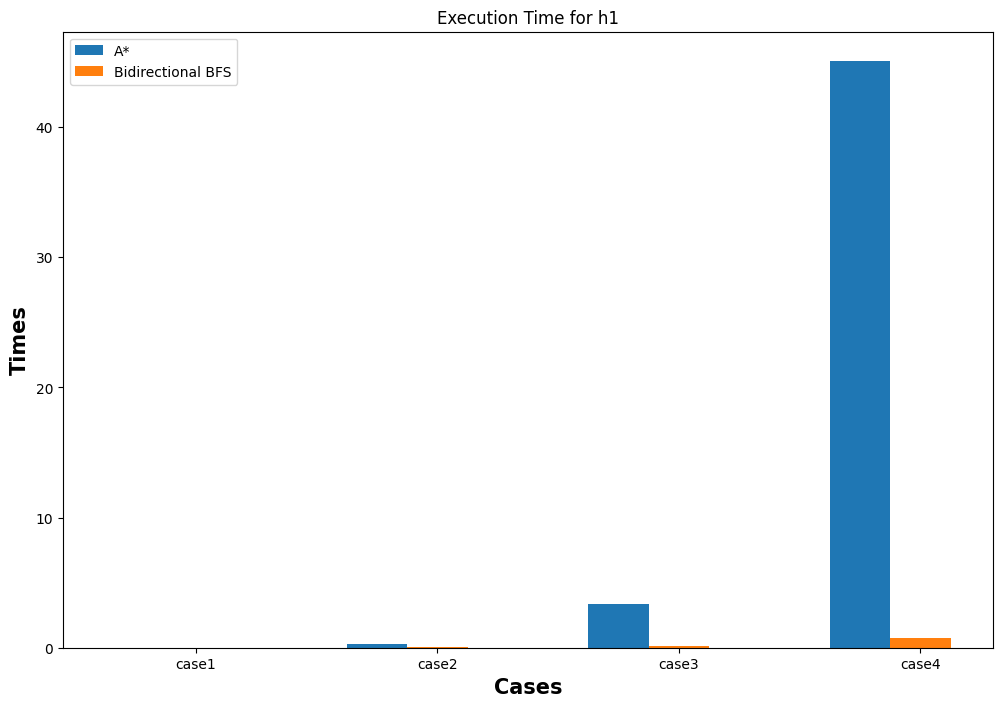

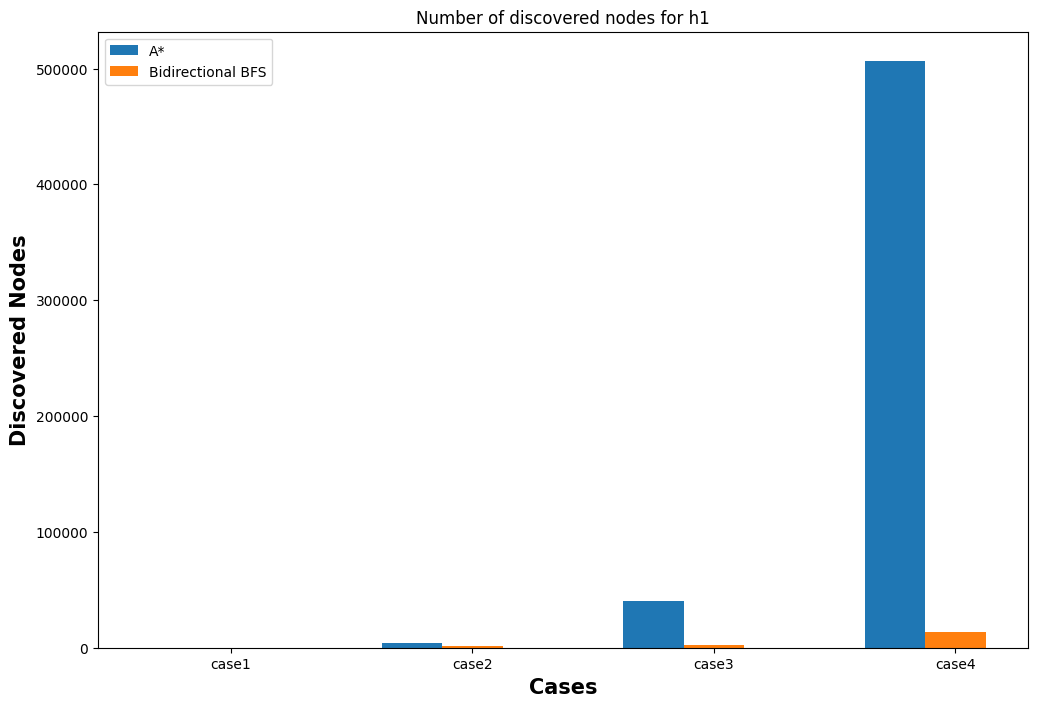

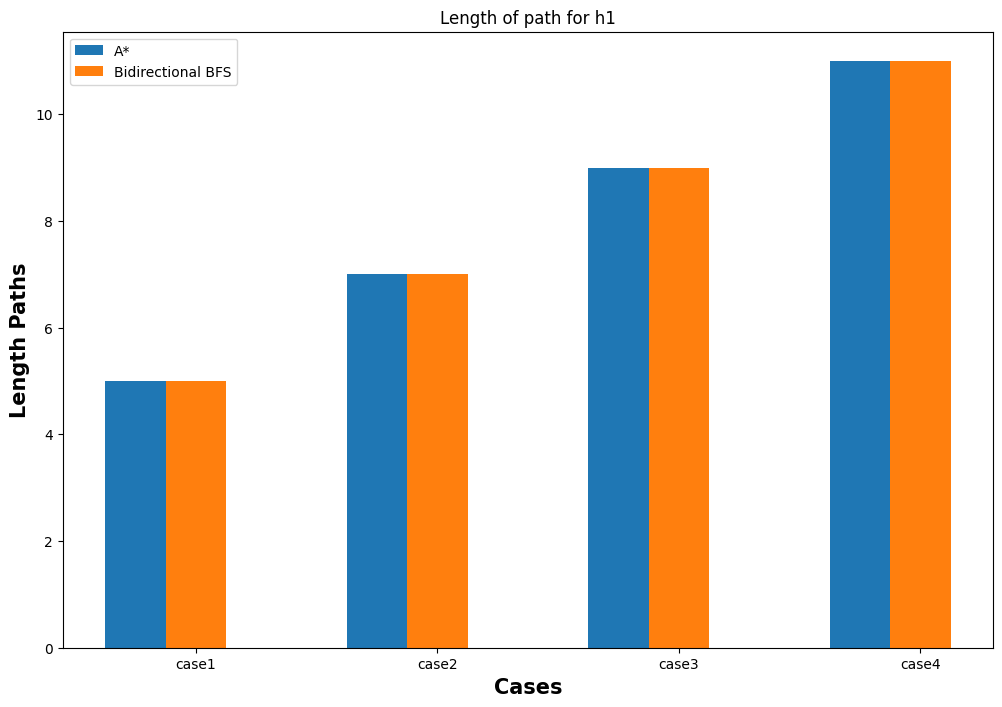

In [61]:
# Execution Time Plot
plot_data('Times', 'Execution Time for h1', CASES, [h1_astar_times, bfs_times], ['A*', 'Bidirectional BFS'])

# Discovered Nodes Plot
plot_data('Discovered Nodes', 'Number of discovered nodes for h1', CASES, [h1_astar_discovered_nodes, bfs_discovered_nodes], ['A*', 'Bidirectional BFS'])

# Length Paths Plot
plot_data('Length Paths', 'Length of path for h1', CASES, [h1_astar_len_paths, bfs_len_paths], ['A*', 'Bidirectional BFS'])

#### Plot Comparison

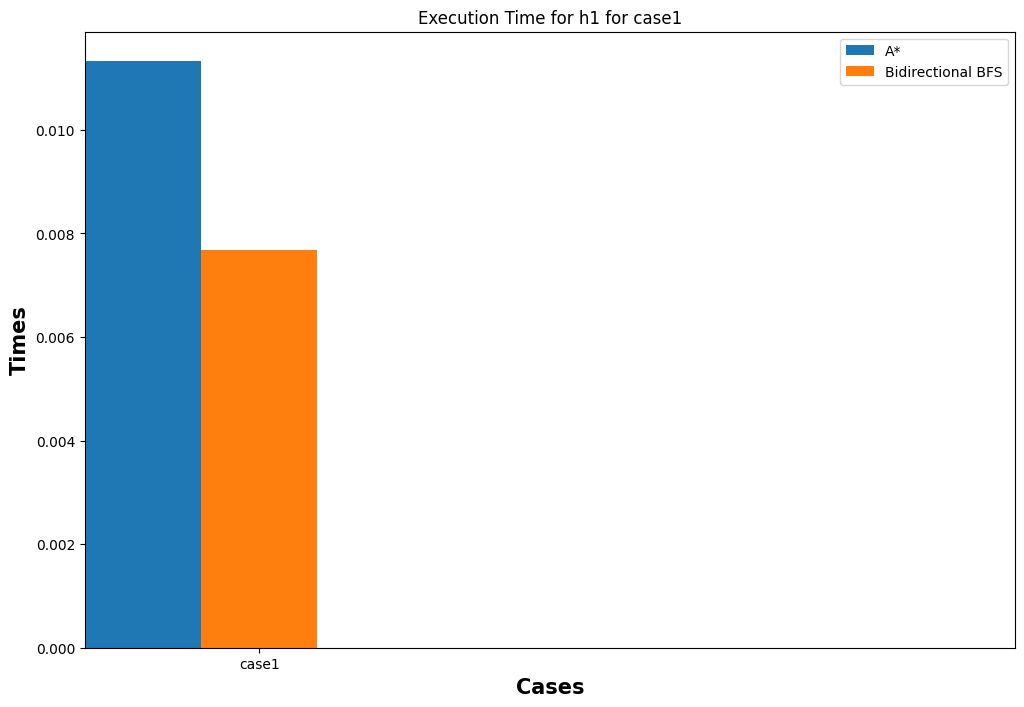

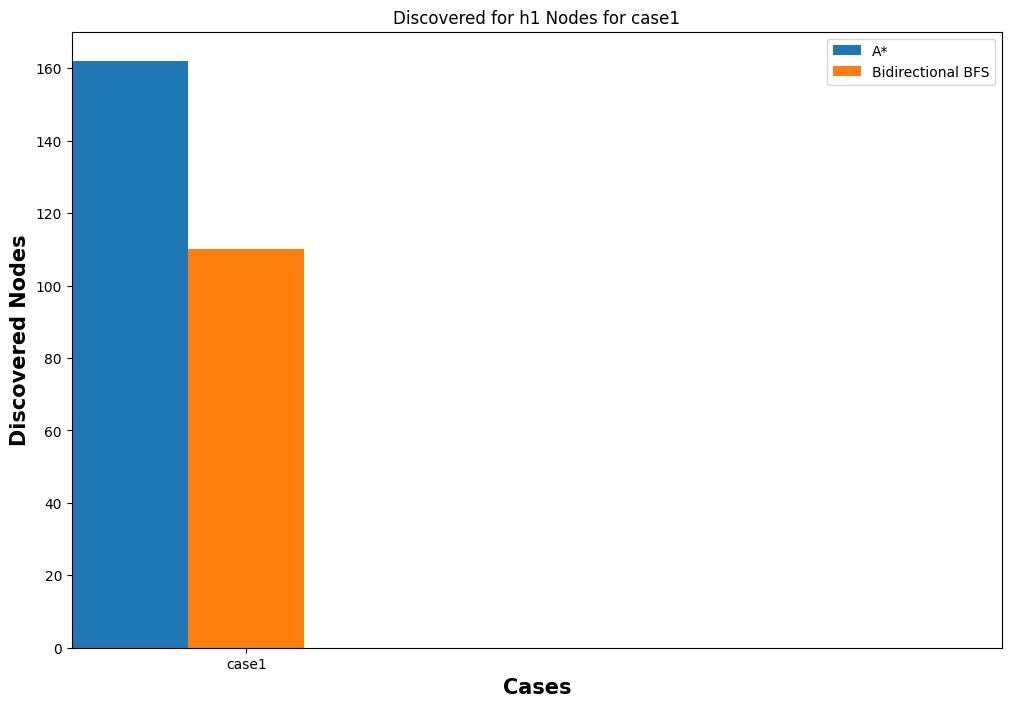

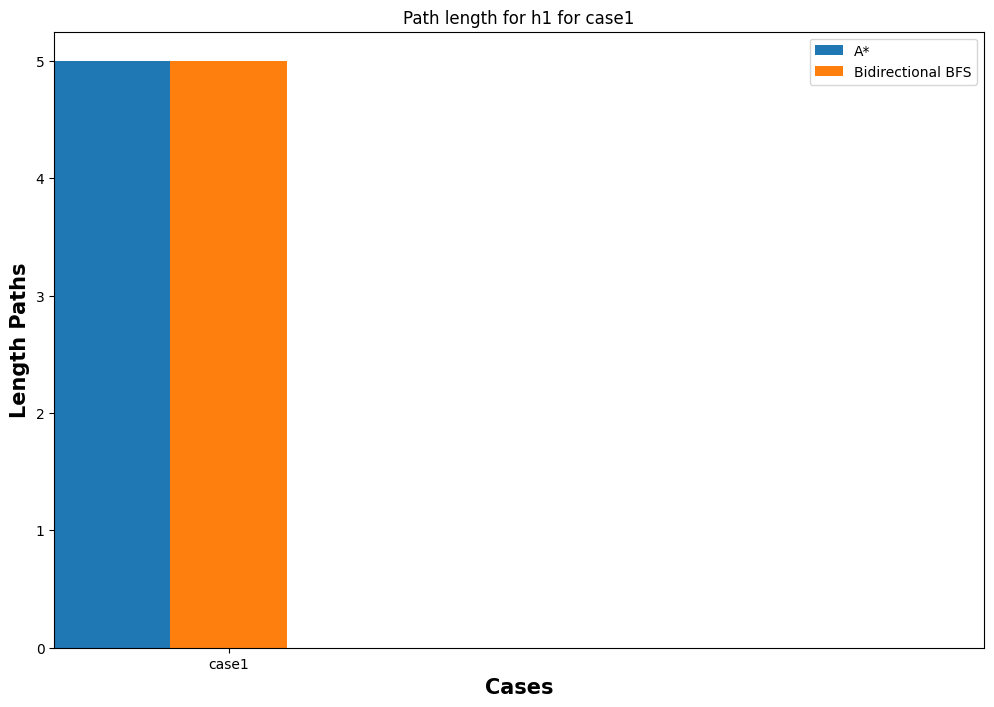

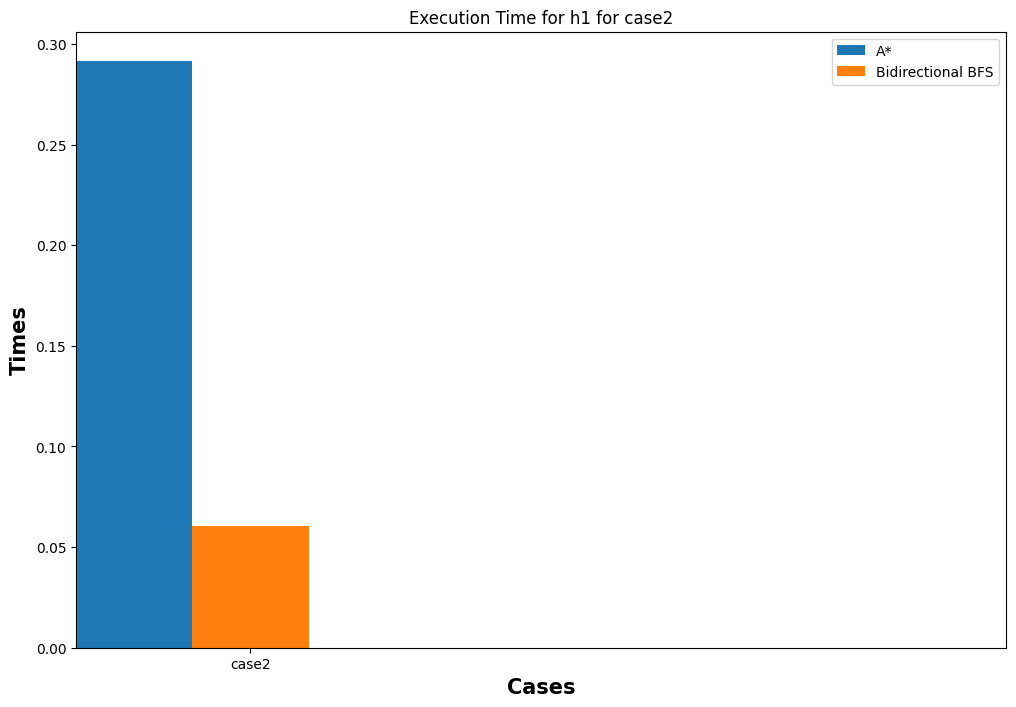

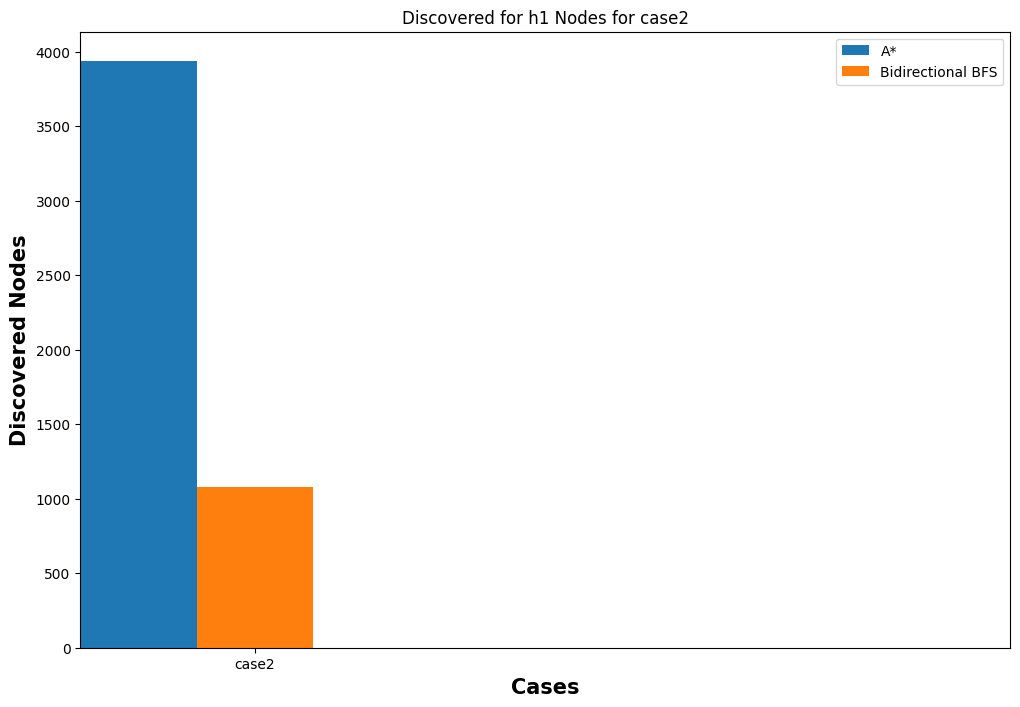

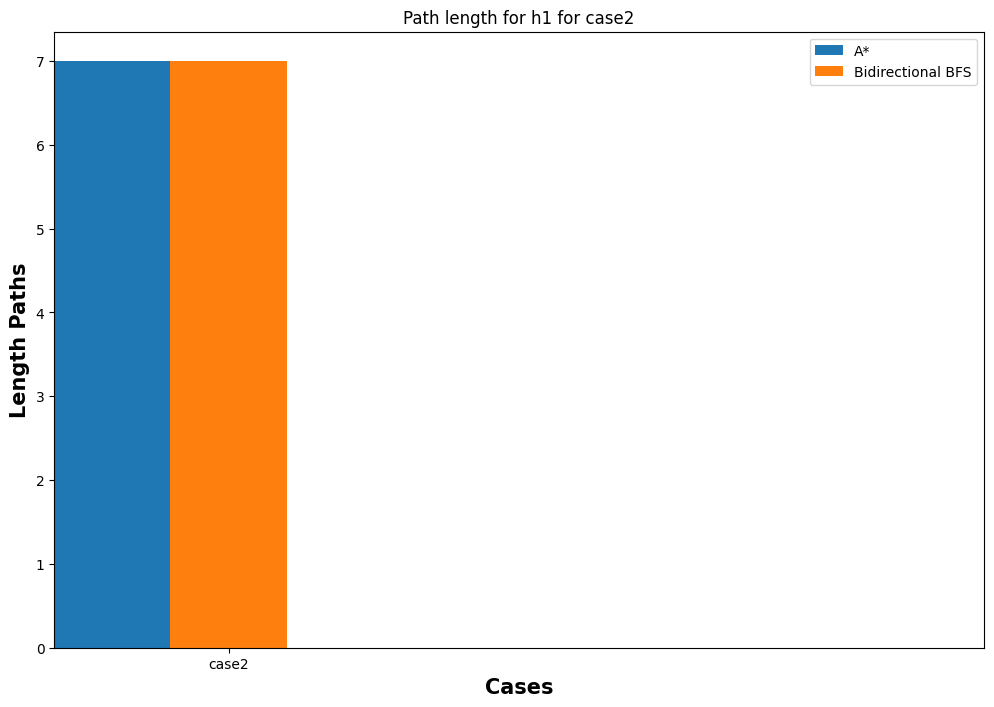

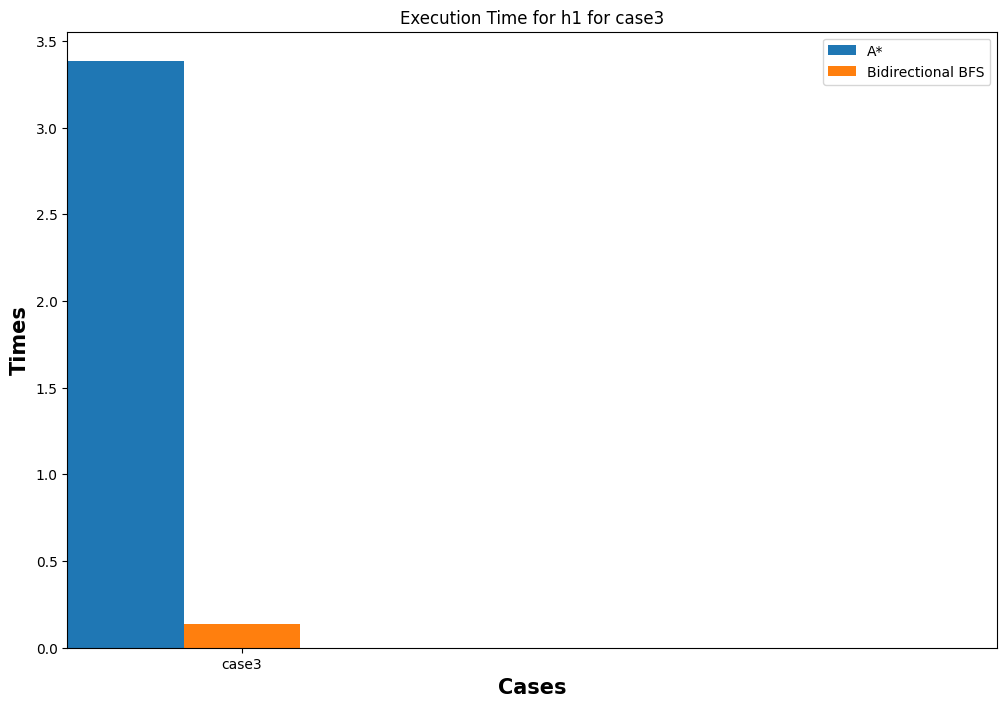

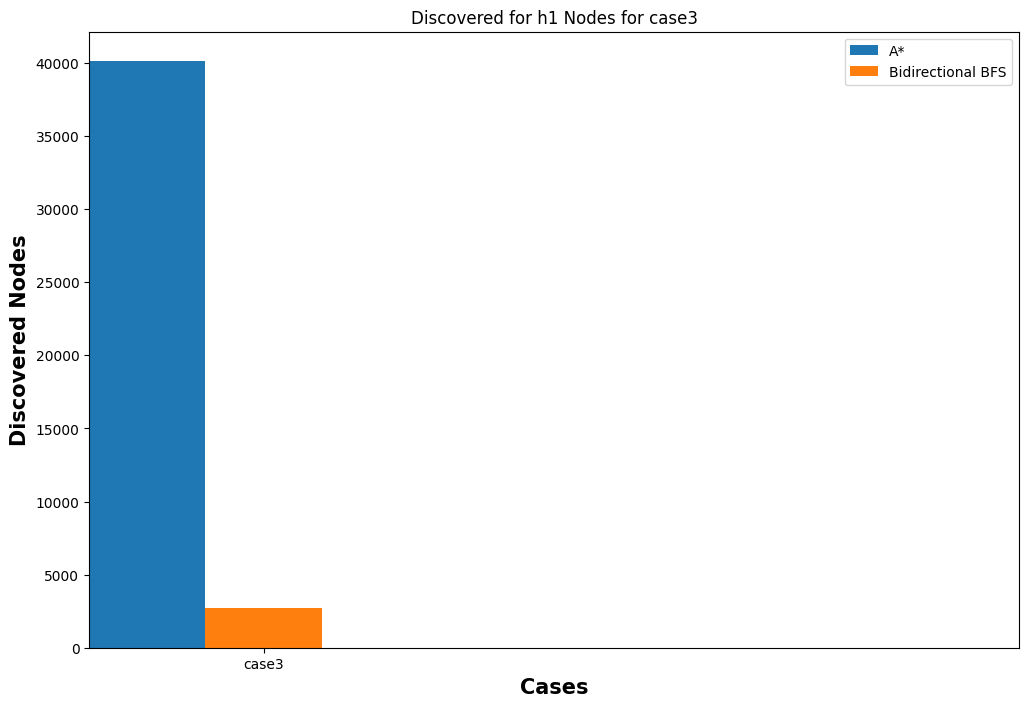

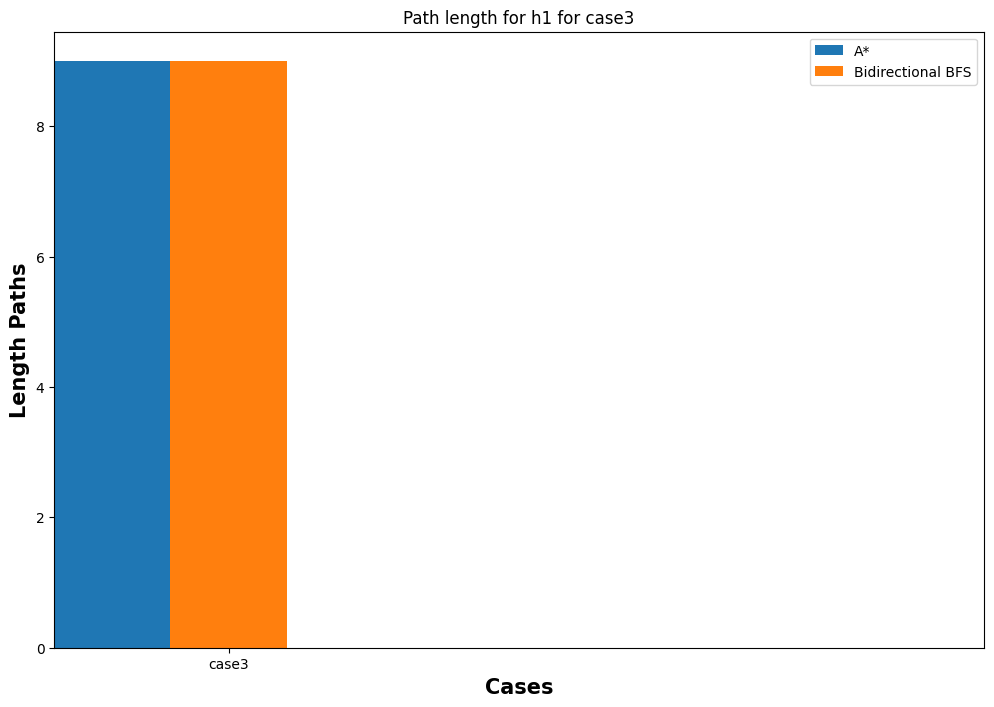

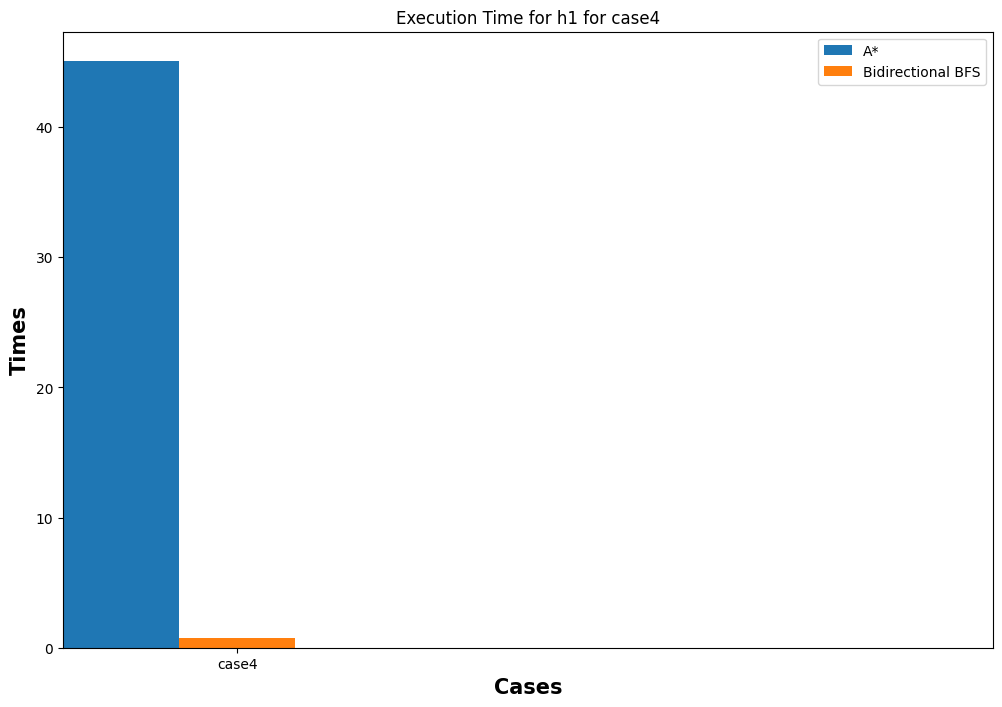

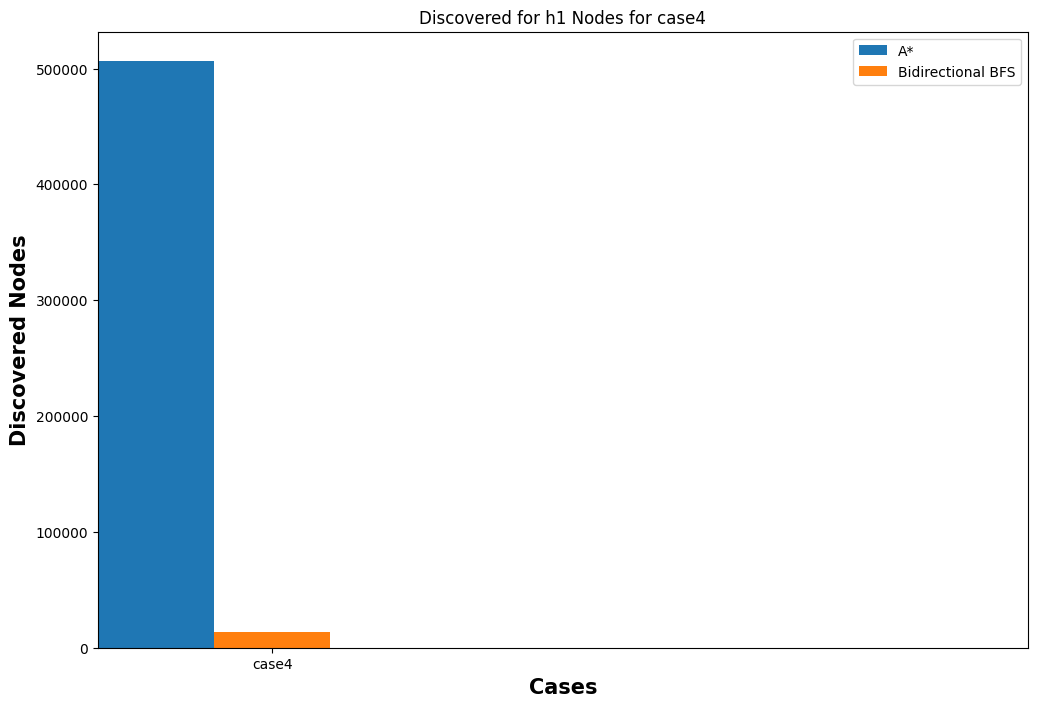

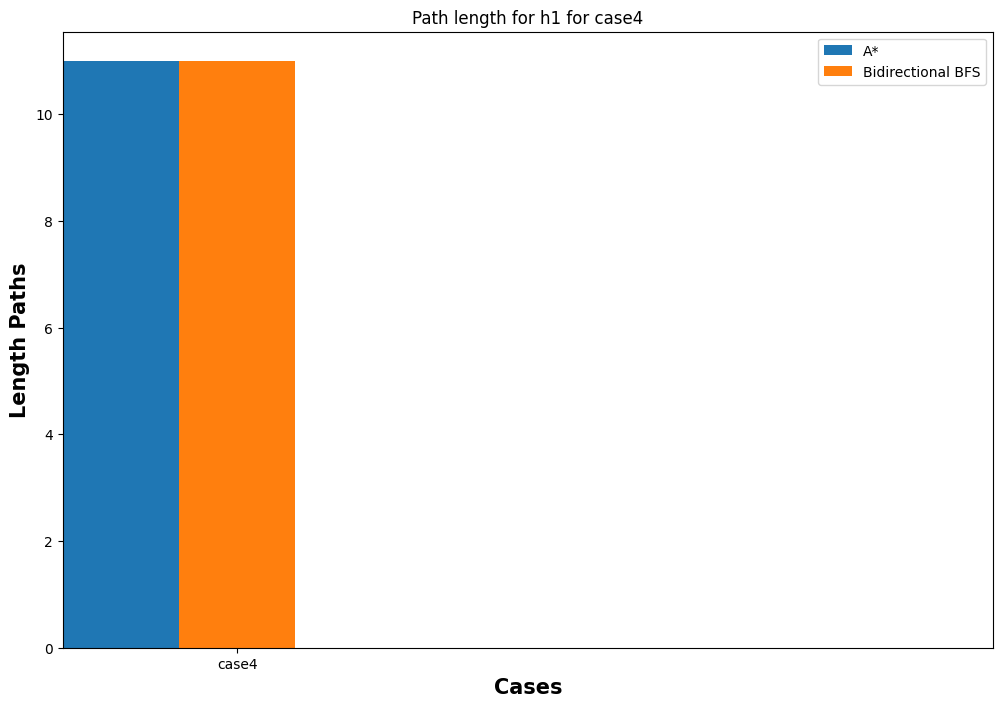

In [62]:
for i, case in enumerate(CASES):
    # Execution Time Plot
    plot_data('Times', 'Execution Time for h1 for ' + case, [case], [[h1_astar_times[i]], [bfs_times[i]]], ['A*', 'Bidirectional BFS'], single=True)

    # Discovered Nodes Plot
    plot_data('Discovered Nodes', 'Discovered for h1 Nodes for ' + case,  [case], [[h1_astar_discovered_nodes[i]], [bfs_discovered_nodes[i]]], ['A*', 'Bidirectional BFS'], single=True)

    # Length Paths Plot
    plot_data('Length Paths', 'Path length for h1 for ' + case, [case], [[h1_astar_len_paths[i]], [bfs_len_paths[i]]], ['A*', 'Bidirectional BFS'], single=True)

#### MCTS Stats

##### MCTS Data

In [47]:
h1_labels = load_array_from_file('h1_labels')
h1_mcts_times = load_array('h1_mcts_times.npy')
h1_mcts_discovered_nodes = load_array('h1_mcts_discovered_nodes.npy')
h1_mcts_len_paths = load_array('h1_mcts_len_paths.npy')
h1_mcts_potential_paths = load_array('h1_mcts_potential_paths.npy')

h2_labels = load_array_from_file('h2_labels')
h2_mcts_times = load_array('h2_mcts_times.npy')
h2_mcts_discovered_nodes = load_array('h2_mcts_discovered_nodes.npy')
h2_mcts_len_paths = load_array('h2_mcts_len_paths.npy')
h2_mcts_potential_paths = load_array('h2_mcts_potential_paths.npy')

h3_labels = load_array_from_file('h3_labels')
h3_mcts_times = load_array('h3_mcts_times.npy')
h3_mcts_discovered_nodes = load_array('h3_mcts_discovered_nodes.npy')
h3_mcts_len_paths = load_array('h3_mcts_len_paths.npy')
h3_mcts_potential_paths = load_array('h3_mcts_potential_paths.npy')

##### MCTS Plots

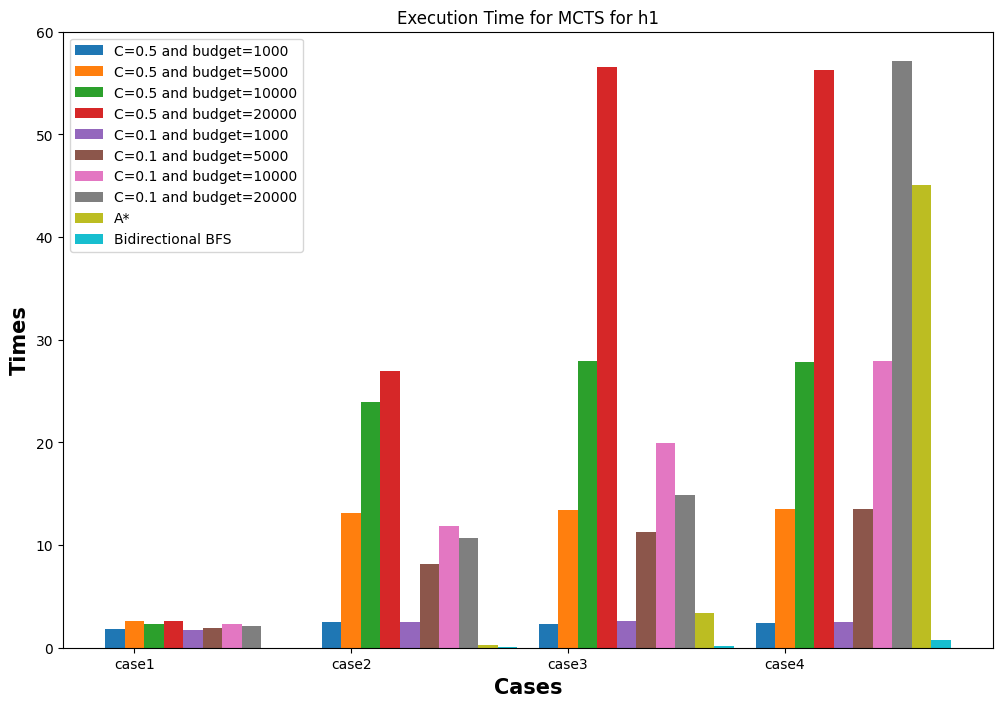

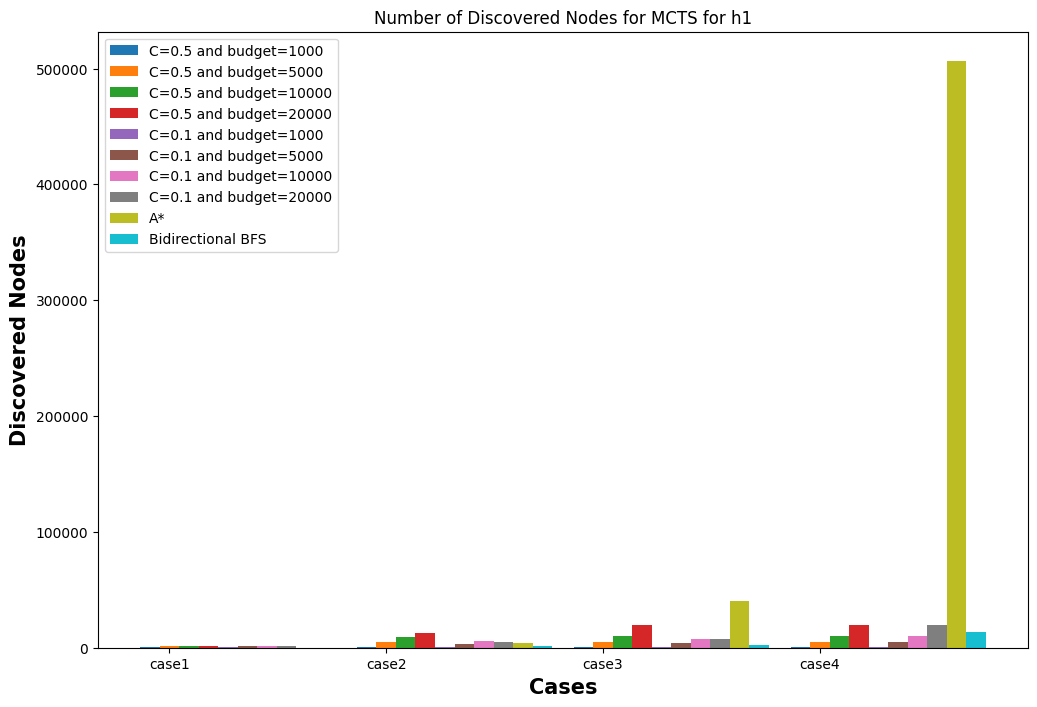

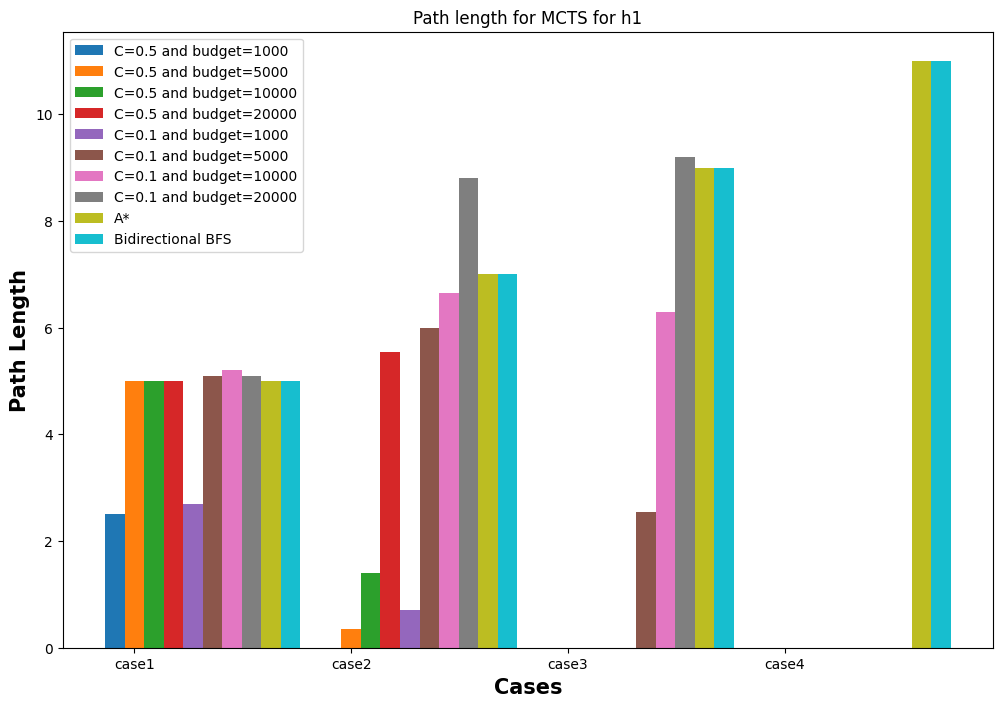

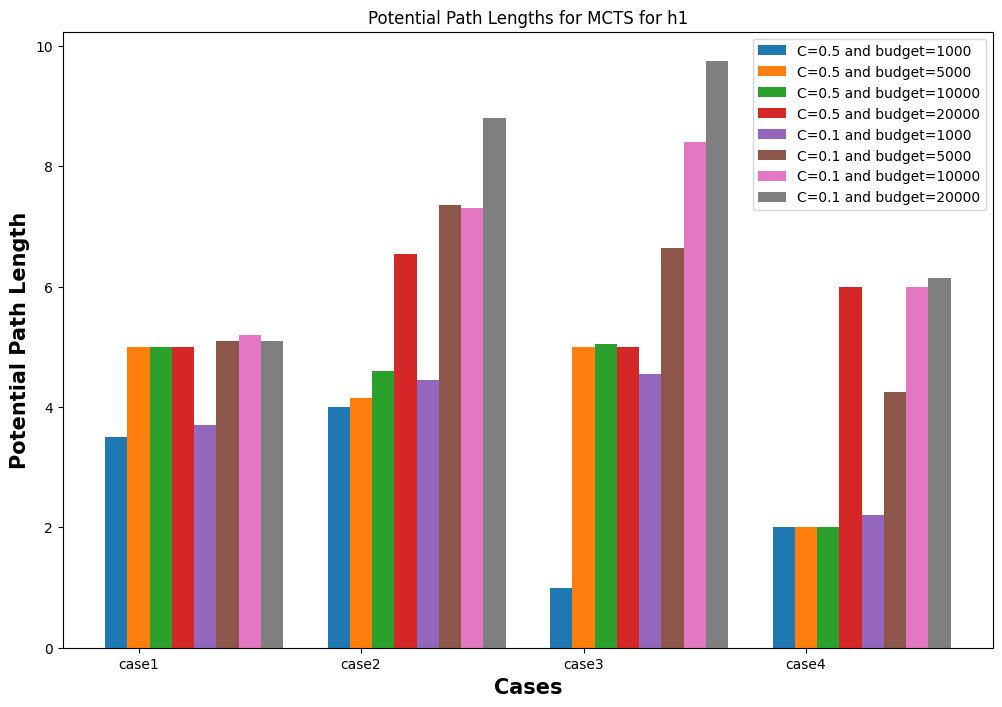

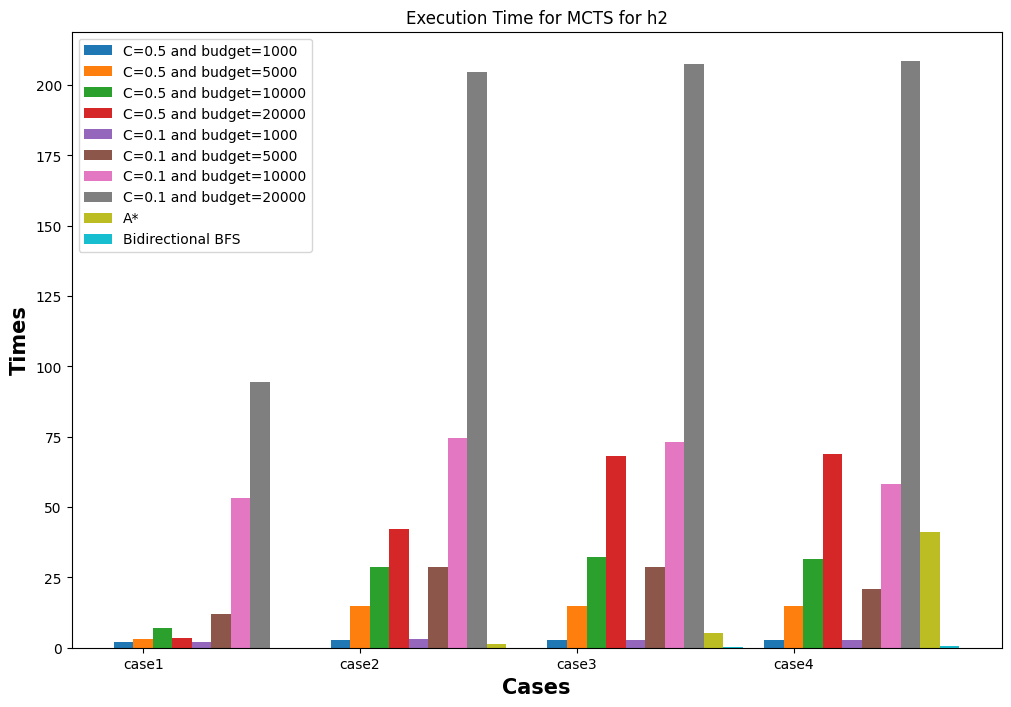

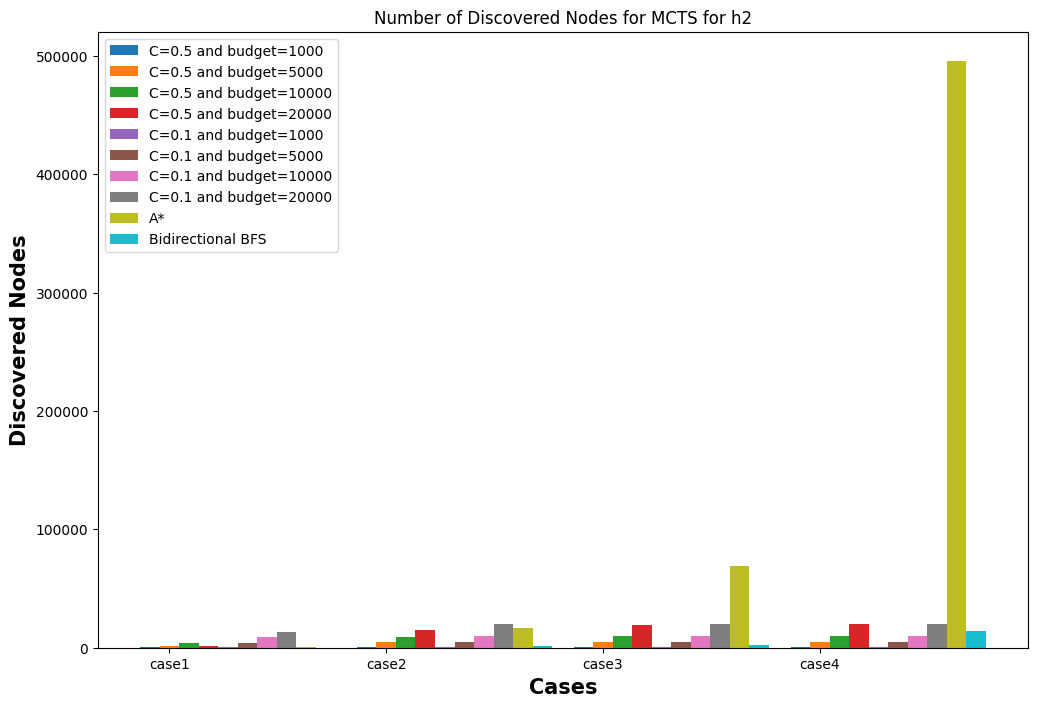

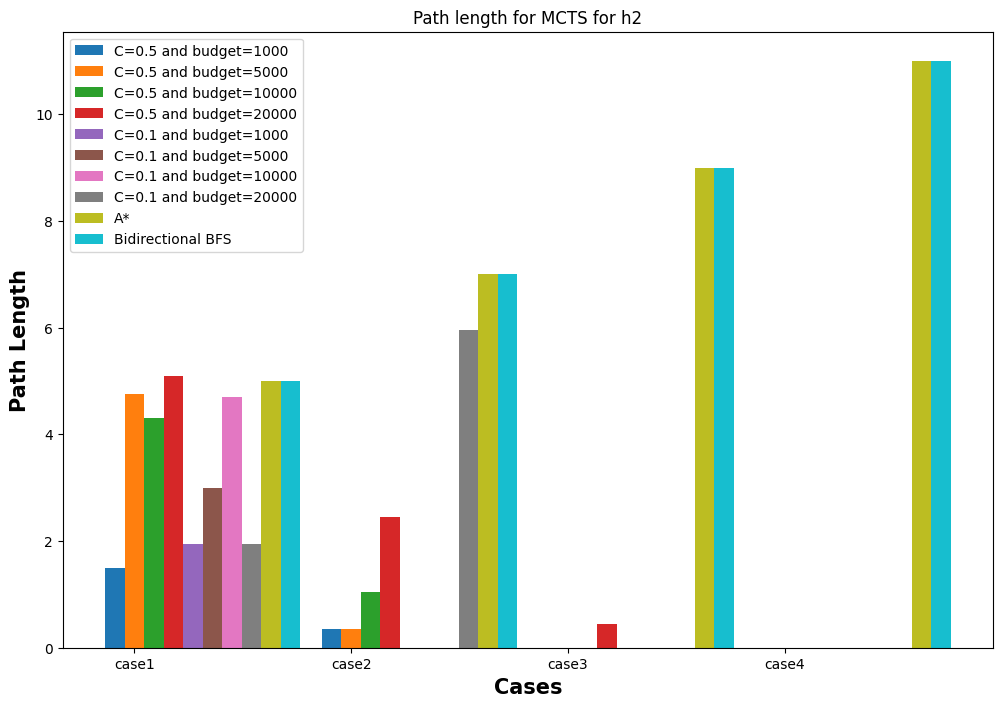

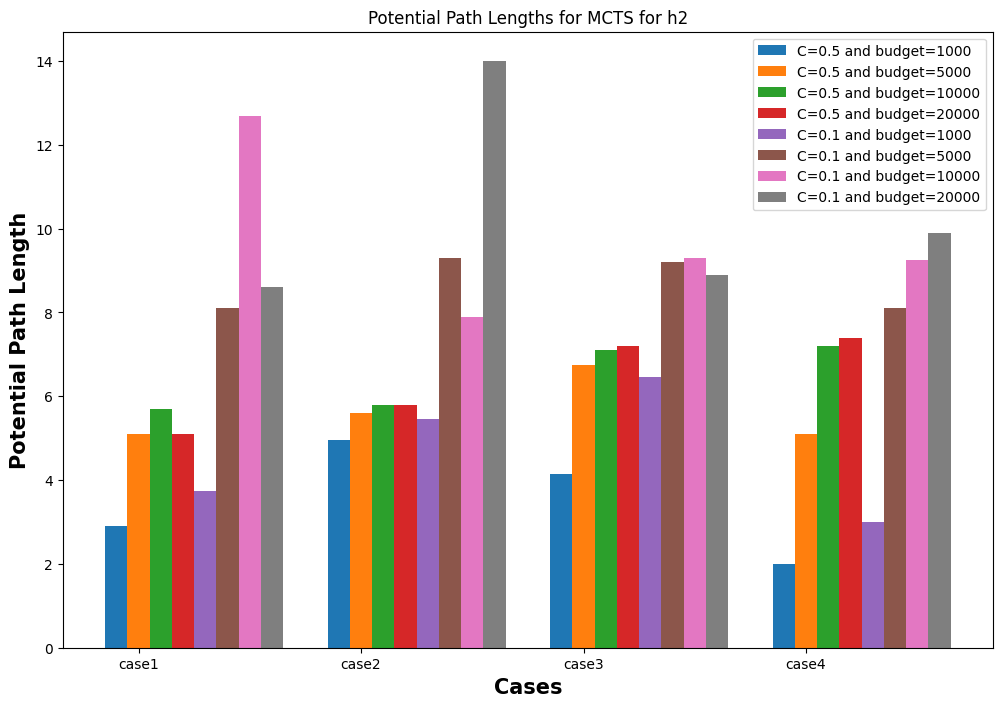

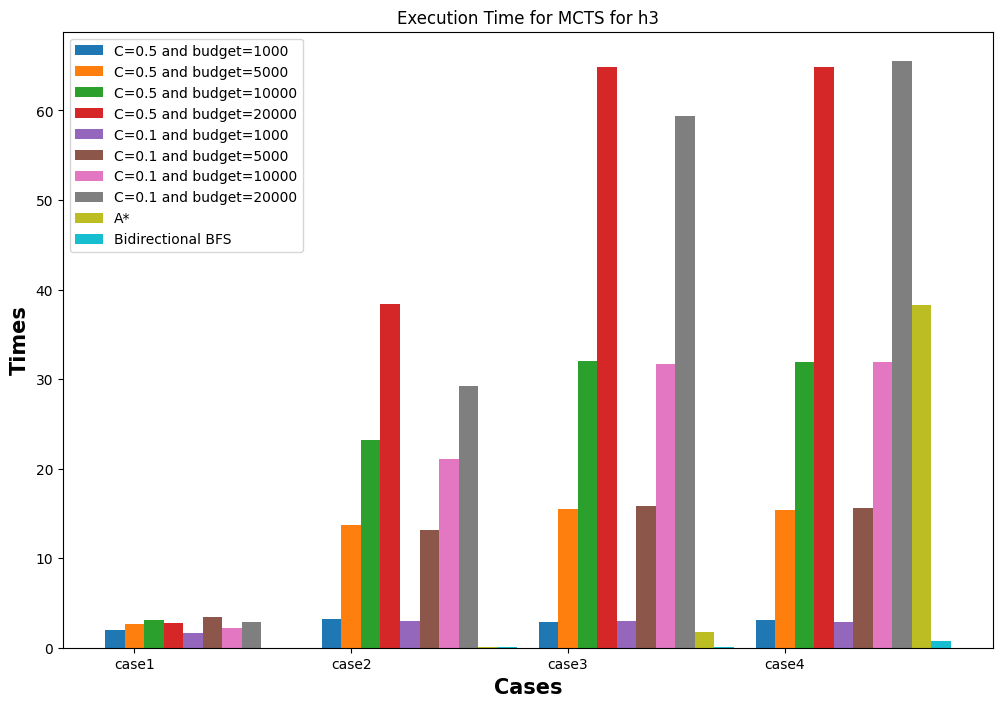

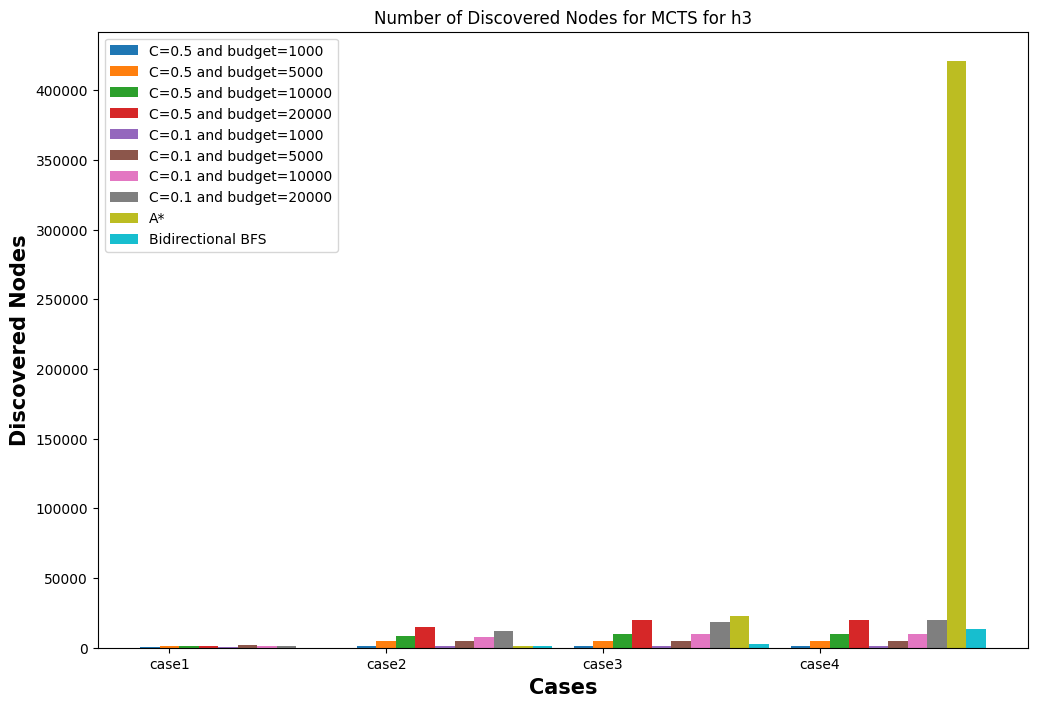

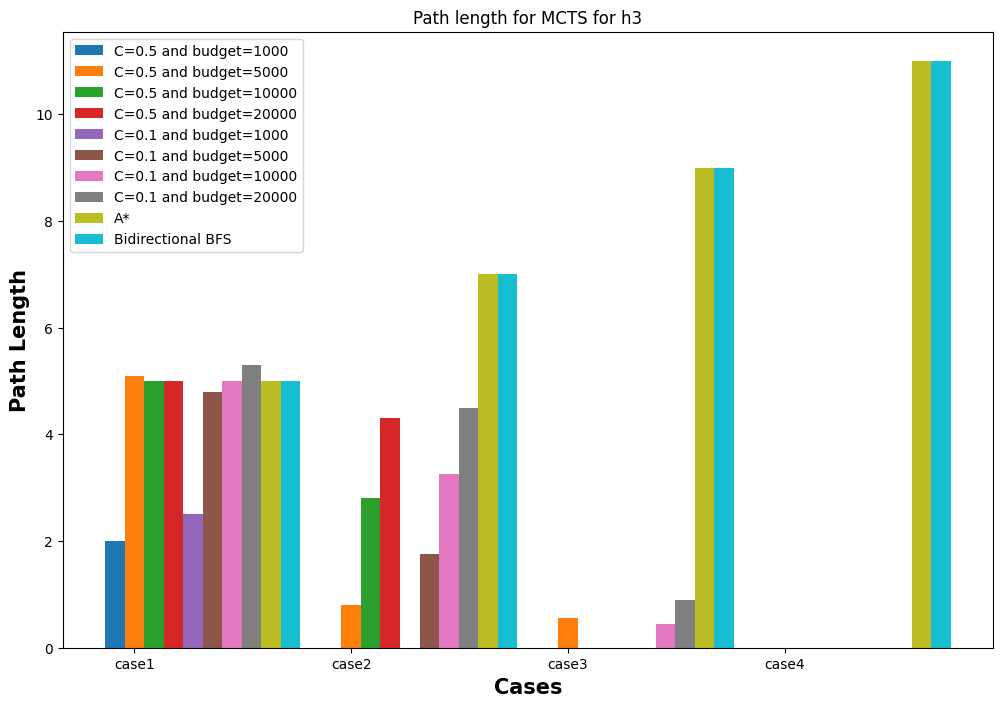

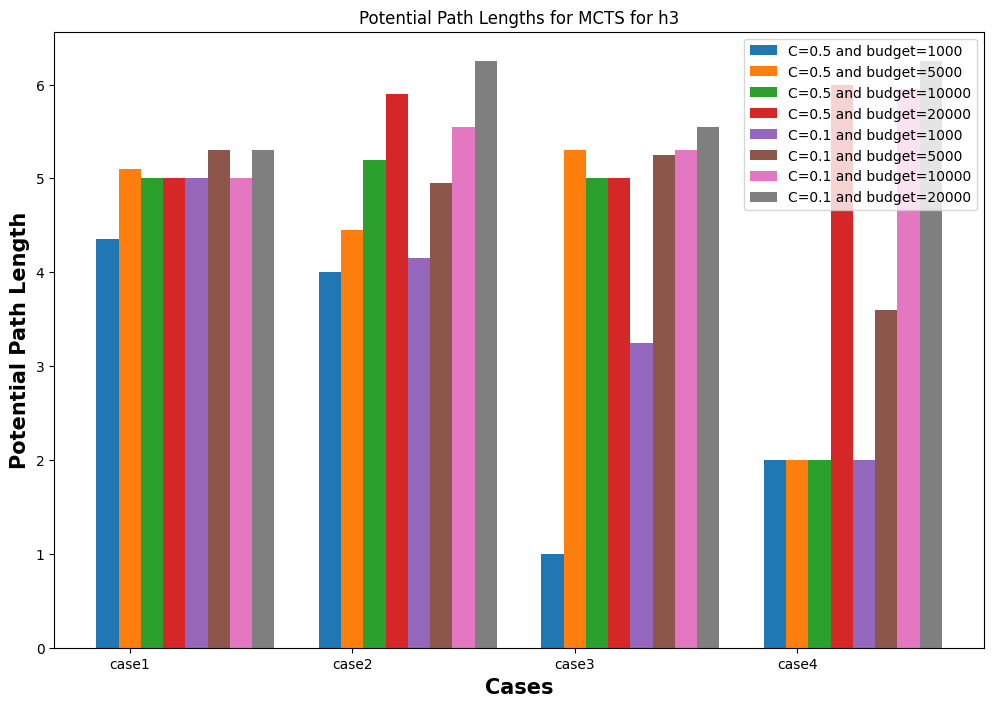

In [60]:
# Execution Time h1

h1_data_labels = copy.deepcopy(h1_labels)
h1_data_labels.append('A*')
h1_data_labels.append('Bidirectional BFS')

h1_data_times = copy.deepcopy(h1_mcts_times)
h1_data_times.append(h1_astar_times)
h1_data_times.append(bfs_times)

h1_data_discovered_nodes = copy.deepcopy(h1_mcts_discovered_nodes)
h1_data_discovered_nodes.append(h1_astar_discovered_nodes)
h1_data_discovered_nodes.append(bfs_discovered_nodes)

h1_data_len_paths = copy.deepcopy(h1_mcts_len_paths)
h1_data_len_paths.append(h1_astar_len_paths)
h1_data_len_paths.append(bfs_len_paths)

plot_data('Times', 'Execution Time for MCTS for h1', CASES, h1_data_times, h1_data_labels, barWidth=0.09)

plot_data('Discovered Nodes', 'Number of Discovered Nodes for MCTS for h1', CASES, h1_data_discovered_nodes, h1_data_labels, barWidth=0.09)

plot_data('Path Length', 'Path length for MCTS for h1', CASES, h1_data_len_paths, h1_data_labels, barWidth=0.09)

plot_data('Potential Path Length', 'Potential Path Lengths for MCTS for h1', CASES, h1_mcts_potential_paths, h1_labels, barWidth=0.1)

# Execution Time h2

h2_data_labels = copy.deepcopy(h2_labels)
h2_data_labels.append('A*')
h2_data_labels.append('Bidirectional BFS')

h2_data_times = copy.deepcopy(h2_mcts_times)
h2_data_times.append(h2_astar_times)
h2_data_times.append(bfs_times)

h2_data_discovered_nodes = copy.deepcopy(h2_mcts_discovered_nodes)
h2_data_discovered_nodes.append(h2_astar_discovered_nodes)
h2_data_discovered_nodes.append(bfs_discovered_nodes)

h2_data_len_paths = copy.deepcopy(h2_mcts_len_paths)
h2_data_len_paths.append(h2_astar_len_paths)
h2_data_len_paths.append(bfs_len_paths)

plot_data('Times', 'Execution Time for MCTS for h2', CASES, h2_data_times, h2_data_labels, barWidth=0.09)

plot_data('Discovered Nodes', 'Number of Discovered Nodes for MCTS for h2', CASES, h2_data_discovered_nodes, h2_data_labels, barWidth=0.09)

plot_data('Path Length', 'Path length for MCTS for h2', CASES, h2_data_len_paths, h2_data_labels, barWidth=0.09)

plot_data('Potential Path Length', 'Potential Path Lengths for MCTS for h2', CASES, h2_mcts_potential_paths, h2_labels, barWidth=0.1)

# Execution Time h3

h3_data_labels = copy.deepcopy(h3_labels)
h3_data_labels.append('A*')
h3_data_labels.append('Bidirectional BFS')

h3_data_times = copy.deepcopy(h3_mcts_times)
h3_data_times.append(h3_astar_times)
h3_data_times.append(bfs_times)

h3_data_discovered_nodes = copy.deepcopy(h3_mcts_discovered_nodes)
h3_data_discovered_nodes.append(h3_astar_discovered_nodes)
h3_data_discovered_nodes.append(bfs_discovered_nodes)

h3_data_len_paths = copy.deepcopy(h3_mcts_len_paths)
h3_data_len_paths.append(h3_astar_len_paths)
h3_data_len_paths.append(bfs_len_paths)

plot_data('Times', 'Execution Time for MCTS for h3', CASES, h3_data_times, h3_data_labels, barWidth=0.09)

plot_data('Discovered Nodes', 'Number of Discovered Nodes for MCTS for h3', CASES, h3_data_discovered_nodes, h3_data_labels, barWidth=0.09)

plot_data('Path Length', 'Path length for MCTS for h3', CASES, h3_data_len_paths, h3_data_labels, barWidth=0.09)

plot_data('Potential Path Length', 'Potential Path Lengths for MCTS for h3', CASES, h3_mcts_potential_paths, h3_labels, barWidth=0.1)